# Python for solving lighthouse problem

(from D. Sivia's book, "Data Analysis - A Bayesian Tutorial"):

A lighthouse is somewhere off a piece of straight coastline at a position $\alpha$ along the shore and a distance $\beta$ out at sea. It emits a series of short highly collimated flashes at random intervals and hence at random azimuths. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occurred, but not the angle from which it came. 
$N$ flashes have been recorded so far at positions $\{x_k\}$.

Suppose $\beta$ is given. Where is the lighthouse?


## Guided solution

We need to estimate the parameter $\alpha$. 
Let us start by writing the likelihood for this problem; since the flashes are thrown at random azimuths, we know that:
$$P(\theta_k | \alpha, \beta) = \frac{1}{\pi}.$$

Moreover,
$$\beta \tan(\theta_k) = x_k - \alpha,$$
and by changing variables we get
$$P(x_k | \alpha, \beta) = \frac{\beta}{\pi \big[ \beta^2 + (x_k - \alpha)^2 \big]}.$$


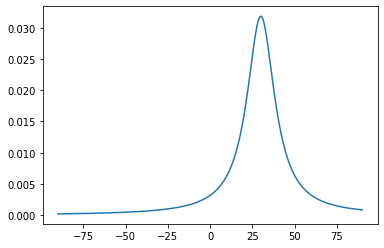

In [2]:
#Importing packages
import matplotlib.pyplot as plt
import numpy as np

    
# defining likelihood
def likelihood(x, a, b):
    return b / (np.pi * (b ** 2 + (x - a) ** 2))

# Parameters
a = 30.0  
b  = 10.0 
    
#Plotting likelihood
x = np.linspace(-90, 90, 1001)
%matplotlib inline
plt.plot(x, likelihood(x, a, b))


The above likelihood is the a Cauchy or Lorentz distribution. 
We will sample from it so that we can have some synthetic data to work with.

## Generate some synthetic data

In [4]:
from scipy.stats import cauchy
samples = cauchy.rvs(loc = a, scale = b, size = 1000)

In order to write the posterior we use Bayes theorem
$$P(\alpha | \{x_k\}, \beta) \propto \prod_{k = 1}^N P(\{x_k\} | \alpha, \beta)$$

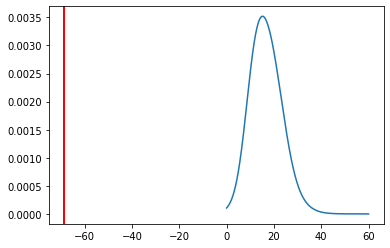

In [15]:

def posterior(x, a, b):
    post = np.ones(len(a))
    for x_k in x:
        post *= likelihood(x_k, a, b)
        post /= np.sum(post)
    return post

def plot_posterior(n_samples):
    alphas = np.linspace(0, 60, 1000)
    
    plt.plot(alphas, posterior(samples[:n_samples], alphas, b))
    plt.axvline(np.mean(samples[:n_samples]), c = "r", lw = 2)
    
plot_posterior(10)


 Creating 4 subplots for different  values of $N = 2, 5, 20, 100$.

Text(0.5, 1, '$N = 100$')

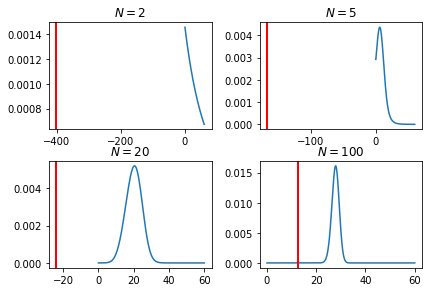

In [17]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout()

alphas = np.linspace(0, 60, 1001)

axs[0,0].plot(alphas, posterior(samples[:2], alphas, b))
axs[0,0].axvline(np.mean(samples[:2]), c = "r", lw = 2)
axs[0,0].set_title(r"$N = 2$")
axs[0,1].plot(alphas, posterior(samples[:5], alphas, b))
axs[0,1].axvline(np.mean(samples[:5]), c = "r", lw = 2)
axs[0,1].set_title(r"$N = 5$")
axs[1,0].plot(alphas, posterior(samples[:20], alphas, b))
axs[1,0].axvline(np.mean(samples[:20]), c = "r", lw = 2)
axs[1,0].set_title(r"$N = 20$")
axs[1,1].plot(alphas, posterior(samples[:100], alphas, b))
axs[1,1].axvline(np.mean(samples[:100]), c = "r", lw = 2)
axs[1,1].set_title(r"$N = 100$")

Note the mean does not coincide with the mode of the posterior!

Why is that? Will they coincide in the $N \to \infty$ limit?

Now compute the value of $\alpha$ that maximizes the posterior (and the likelihood, since our prior here is uniform).
The log-likelihood reads:
$$\mathcal{L} (\alpha) = \sum_k \log P(x_k | \alpha, \beta) = -\sum_k \log[\beta^2 + (x_k - \alpha)^2)] + {\rm c,}$$
where $c$ is a constant. 

Hence the maximum is obtained at
$$2 \sum_k \frac{x_k - \alpha^\ast}{\beta^2 + (x_k - \alpha^\ast)^2} = 0.$$

Now let's solve this numerically for different values of $N$.

Plotting the ML estimate of $\alpha$ for $N$ between 10 and 1000.

Text(0, 0.5, '$\\alpha$')

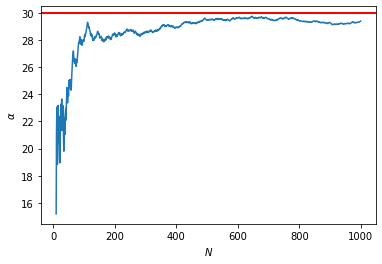

In [18]:
# Use a off the shelf method to find a root of a function on an interval - ex: bisect, brentq, brenth, ridder
from scipy.optimize import bisect  # Bisection method is probably the simpler to understand
# Your solution goes here
def f(alpha, x):
    return 2 * np.sum((x - alpha) / (b ** 2 + (x - alpha) ** 2))

ns = range(10,1000)
alphas = [bisect(f, -90, 90, args = samples[:n_samples]) for n_samples in ns]
plt.plot(ns, alphas)
plt.axhline(30, color = "r", lw = 2)
plt.xlabel(r"$N$")
plt.ylabel(r"$\alpha$")